<h2> Application Logistic Regression for determining the bridge condition</h2>
<h3> Train Data are from bridge investigated in 2022 and Test data is for bridges evaluated in 2023 but not in 2022 </h3>
<h2>...</h2>
<h2>..</h2>
<h2>Lets GO!!!!</h2>

In [10]:
!pip install matplotlib_map_utils
!pip install numpy==1.25.0. 
!pip install geopandas
!pip install scikit-learn

  Using cached numpy-1.25.0.tar.gz (10.4 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [33 lines of output]
  Traceback (most recent call last):
    File "C:\Users\Sushant\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "C:\Users\Sushant\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\Sushant\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 112, in get_requires_for_build_wheel
      backend = _build_backend()
                ^^^^^^^^^^^^^^^^
    File "C:\Users\Sushant\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 77, in _build_backend
      obj = import_module(mod_path)
            ^^^^^^^^^^^^^

In [12]:
#Import libraries
import os #Operating System interactions
import pandas as pd #Panel Data - for working with tabular data
import geopandas as gp # for GIS analysis or Geo Processing
from shapely.geometry import Point #Allows you to vreate gpkg files from xy data
import numpy as np #Numerical Calc
from matplotlib import pyplot as plt 
import matplotlib_map_utils as mapu #Alias of Map Utils like 'plt' for plot. For North Arrow.

In [13]:
#Set the directories
path = 'C:/Users/Sushant/OneDrive - Lamar University/1st semester/GIS/Project/Mini Project 1/Trial 2'
os.chdir(path) #Change the directory to that path

In [14]:
fname1 = 'Texas_County_Boundaries_Detailed_-8171692547258718760.gpkg'
texas = gp.read_file(fname1)

In [15]:
# Reproject the data to WGS84 (EPSG:4326)
texas_wgs84 = texas.to_crs(epsg=4326)

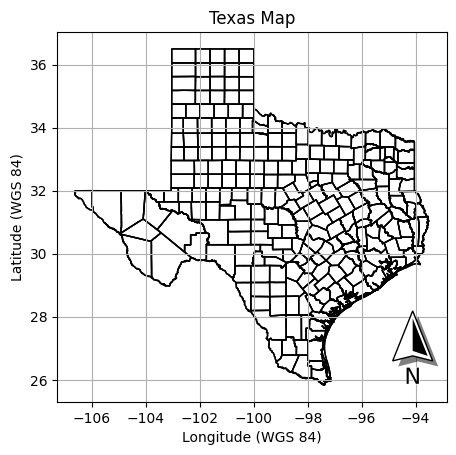

In [16]:
#Visualize the overlay result (you can customise this based on your needs)
fig = plt.figure()
ax1 = fig.add_subplot() #we have multiple layers being added, so when we have to plot multiple layers on the plot, we need to make sure all of them are plotted on the same axis.
texas_wgs84.plot (facecolor='white', edgecolor='black', ax=ax1) #ax=ax1 - overlaping axis. 
texas_wgs84.plot(ax=ax1, color='none', markersize=1)
mapu.north_arrow.north_arrow(ax=ax1, location='lower right', rotation={'degrees':0}) 
ax1.set_xlabel('Longitude (WGS 84)')
ax1.set_ylabel('Latitude (WGS 84)')
plt.grid()
plt.title ('Texas Map')
plt.show()

In [668]:
#Read the data from the csv files for all the bridges from 2022 and 2023
df_2023 = pd.read_csv('Bridge_2023.csv')
df_2022 = pd.read_csv('Bridge_2022.csv')
df_2023_new = pd.read_csv('new_bridges_2023.csv')

C:\Users\Sushant\AppData\Local\ipykernel_8836\693471169.py:2: DtypeWarning: Columns (102) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2023 = pd.read_csv('Bridge_2023.csv')
C:\Users\Sushant\AppData\Local\ipykernel_8836\693471169.py:3: DtypeWarning: Columns (102) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2022 = pd.read_csv('Bridge_2022.csv')


In [669]:
# Getting Age of the Bridge for both 2022 and ...2023 that are not surveyed in 2022
df_2023_new['AGE'] = 2024 - df_2023_new['YEAR_BUILT_027']
df_2022['AGE'] = 2024 - df_2022['YEAR_BUILT_027']

In [670]:
#Bridge surved in 2023 were not surved in 2022., Getting the Columns required
df_2023_new = df_2023_new[['STRUCTURE_NUMBER_008', 'LAT_016', 'LONG_017', 'DECK_COND_058', 
                  'SUPERSTRUCTURE_COND_059', 'CHANNEL_COND_061', 'ADT_029', 
                   'DECK_AREA', 'MAX_SPAN_LEN_MT_048','AGE']].copy()

<h3> We need to take care of the data that are empty and with N values</h3>
<h3> Decided to replaced those values with mean number of the entire column such that there will be no descripency in the final result we expect</h3>
<h3>Mean value and nearest neighbor resulted in the same values of the empty cells thus we are proceeding with mean value</h3>

In [671]:
# The cells with blank cells and 'N' are to be taken cared with
# Define the columns to be processed
columns_to_process = ['DECK_COND_058', 'SUPERSTRUCTURE_COND_059', 'CHANNEL_COND_061']

# Replace 'N' with NaN and fill NaN with the mean for each specified column
for column in columns_to_process:
    # Replace 'N' with NaN
    df_2023_new[column] = df_2023_new[column].replace('N', np.nan)
    
    # Calculate the mean, ignoring NaN values, and fill NaN with this mean
    mean_value = df_2023_new[column].astype(float).mean()
    df_2023_new[column] = df_2023_new[column].fillna(mean_value)

df_2023_new = df_2023_new.apply(pd.to_numeric, errors='coerce')


In [733]:
#Bridge surved in 2023 but not in  2022.
df_2022 = df_2022[['STRUCTURE_NUMBER_008', 'LAT_016', 'LONG_017', 'DECK_COND_058', 
                  'SUPERSTRUCTURE_COND_059', 'CHANNEL_COND_061', 'ADT_029', 
                   'DECK_AREA', 'MAX_SPAN_LEN_MT_048','AGE']].copy()

In [734]:
# Define the columns to be processed
columns_to_process = ['DECK_COND_058', 'SUPERSTRUCTURE_COND_059', 'CHANNEL_COND_061']

# Replace 'N' with NaN and fill NaN with the mean for each specified column
for column in columns_to_process:
    # Replace 'N' with NaN
    df_2022[column] = df_2022[column].replace('N', np.nan)
    
    # Calculate the mean, ignoring NaN values, and fill NaN with this mean
    mean_value = df_2022[column].astype(float).mean()
    df_2022[column] = df_2022[column].fillna(mean_value)

df_2022 = df_2022.apply(pd.to_numeric, errors='coerce')

<h3>since we have conditions, Rather than proceeding with single conditions individually we are proceeding with individually greater than 5 and summation of these three variable greater than 21 as 1</h3>

In [897]:
# Calculate the summation
df_2022['summation'] = df_2022[['DECK_COND_058', 'SUPERSTRUCTURE_COND_059', 'CHANNEL_COND_061']].sum(axis=1)

# Apply conditions
df_2022['check'] = np.where(
    (df_2022['summation'] > 21) & 
    (df_2022['DECK_COND_058'] > 5) & 
    (df_2022['SUPERSTRUCTURE_COND_059'] > 5) & 
    (df_2022['CHANNEL_COND_061'] > 5),
    1, 
    0
)

In [898]:
# Count the number of 1s in the 'check' column
count_of_ones_in_check = df_2022['check'].sum()

# Print the result
print(f"Number of 1s in the 'check' column: {count_of_ones_in_check}")

Number of 1s in the 'check' column: 7549


In [899]:
df_2022.head()

,STRUCTURE_NUMBER_008,LAT_016,LONG_017,DECK_COND_058,SUPERSTRUCTURE_COND_059,CHANNEL_COND_061,ADT_029,DECK_AREA,MAX_SPAN_LEN_MT_048,AGE,check,summation
0,NaN,35185702.0,101560762.0,6.809578,6.872818,6.0,100.0,145.50,9.1,16.0,0,19.682396
1,NaN,29362100.0,94272880.0,7.000000,8.000000,7.0,1.0,150.72,14.9,19.0,1,22.000000
2,NaN,29362940.0,94254920.0,7.000000,7.000000,7.0,1.0,74.40,14.6,19.0,0,21.000000
3,NaN,29365160.0,94324020.0,8.000000,8.000000,8.0,100.0,91.91,8.8,12.0,1,24.000000
4,NaN,29413300.0,94044860.0,6.000000,7.000000,7.0,80.0,204.30,4.0,74.0,0,20.000000


<h2>Application of Logistic Regression</h2>

In [909]:
# Logsitic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [901]:
# Step 1: Prepare the input (independent) and output (dependent) variables from df_2023_2022A
X = df_2022[['ADT_029', 'DECK_AREA', 'MAX_SPAN_LEN_MT_048', 'AGE']]  # Independent variables
y = df_2022['check']  # Dependent variable

# Step 2: Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create a pipeline that first imputes missing values and then fits the logistic regression model
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('logistic_regression', LogisticRegression())
])

# Step 4: Fit the model on the training data
pipeline.fit(X_train, y_train)

# Step 5: Evaluate the model on the test data from df_2023_2022A
y_pred = pipeline.predict(X_test)

print("Confusion Matrix (Training Data Test Set):")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report (Training Data Test Set):")
print(classification_report(y_test, y_pred))

X_new = df_2023_new[['ADT_029', 'DECK_AREA', 'MAX_SPAN_LEN_MT_048', 'AGE']]  # Test set features

# Step 7: Make predictions on df_2023_newA
predictions_new = pipeline.predict(X_new)


Confusion Matrix (Training Data Test Set):
[[6849  128]
 [1180  311]]

Classification Report (Training Data Test Set):
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      6977
           1       0.71      0.21      0.32      1491

    accuracy                           0.85      8468
   macro avg       0.78      0.60      0.62      8468
weighted avg       0.83      0.85      0.81      8468



<h2>The model performs well overall, with high accuracy, largely because it effectively identifies class 0. AS we are concerned with the bridge that is mandated to be studied. So Model Gives us high accuracy on identifying bridges to be checked. SO we proceed with the algorithm </h2>h2>

In [912]:
print(predictions_new)

[0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1
 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0
 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0
 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0
 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [913]:
df_2023_new['check'] = predictions_new

In [914]:
df_2023_new.head()

,STRUCTURE_NUMBER_008,LAT_016,LONG_017,DECK_COND_058,SUPERSTRUCTURE_COND_059,CHANNEL_COND_061,ADT_029,DECK_AREA,MAX_SPAN_LEN_MT_048,AGE,check
0,NaN,32.680500,-94.145833,8.0,8.0,7.000000,0.0,127.98,14.9,6.0,0
1,NaN,33.371656,-95.774397,9.0,9.0,9.000000,40.0,97.60,12.2,2.0,1
2,1.092000e+13,33.628550,-96.613514,9.0,9.0,7.234277,55900.0,1404.48,25.0,2.0,1
3,1.092000e+13,33.628522,-96.613681,9.0,9.0,7.234277,55900.0,1367.52,25.0,2.0,1
4,1.092000e+13,33.637911,-96.616428,9.0,9.0,9.000000,54500.0,20821.26,36.6,2.0,0


In [915]:
latitude = df_2023_newA['LAT_016']
longitude = df_2023_newA['LONG_017']

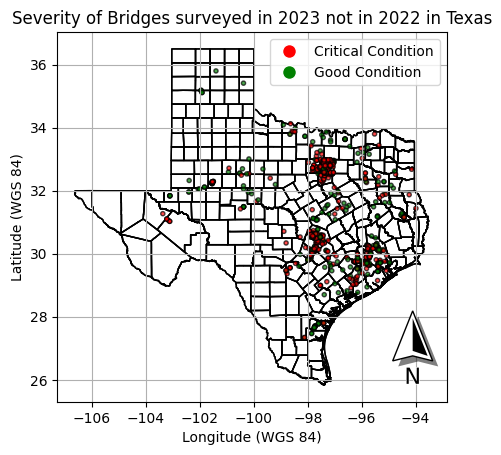

<Figure size 640x480 with 0 Axes>

In [916]:
#Visualize the overlay resultx

fig = plt.figure()
ax1 = fig.add_subplot() #we have multiple layers being added, so when we have to plot multiple layers on the plot, we need to make sure all of them are plotted on the same axis.
texas_wgs84.plot (facecolor='white', edgecolor='black', ax=ax1) #ax=ax1 - overlaping axis. 
texas_wgs84.plot(ax=ax1, color='none', markersize=1)
colors = df_2023_new['check'].map({0: 'red', 1: 'green'})
colors = df_2023_new['check'].map({0: 'red', 1: 'green'})
sizes = df_2023_new['check'].map({0: 1000, 1: 1})  # Adjust sizes here (100 for red, 50 for green)
plt.scatter(longitude,latitude, c=colors, marker='.', edgecolor='k', alpha=0.7, label='Bridge Locations')
mapu.north_arrow.north_arrow(ax=ax1, location='lower right', rotation={'degrees':0}) 
ax1.set_xlabel('Longitude (WGS 84)')
ax1.set_ylabel('Latitude (WGS 84)')
# Create a custom legend
# Create legend handles manually
red_patch = plt.Line2D([0], [0], marker='o', color='w', label='Critical Condition', 
                        markerfacecolor='red', markersize=10)
green_patch = plt.Line2D([0], [0], marker='o', color='w', label='Good Condition', 
                          markerfacecolor='green', markersize=10)

# Add the custom legend to the plot
plt.legend(handles=[red_patch, green_patch], loc='upper right')
plt.grid()
plt.title('Severity of Bridges surveyed in 2023 not in 2022 in Texas')
plt.show()
plt.savefig('bridge_2023_Deck_condition.png', dpi=300, bbox_inches='tight')

<h2>WE Have Successfully indentified the Bridges that are in critical condition and need to be re checked. KUDOS!</h2>